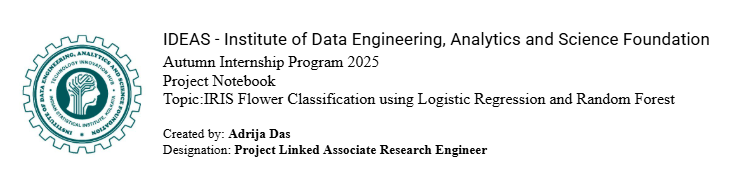

##**Submitted by : Sneha Verma**

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species.It is one of the most famous datasets in machine learning. It contains measurements of 150 iris flowers from three different species:

1.Iris Setosa

2.Iris Versicolor

3.Iris Virginica


For each flower, we have 4 numerical features:

1.Sepal length (cm)

2.Sepal width (cm)

3.Petal length (cm)

4.Petal width (cm)

The goal is to build a classification model that can predict the species of an iris flower based on its features.

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data Loading and Visualization

In [ ]:
# Load iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

# Map numeric labels to species names
species_map = dict(zip(range(3), iris.target_names))
y = y.map(species_map)

# Combine for quick view
df = pd.concat([X, y], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# Dataset info
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


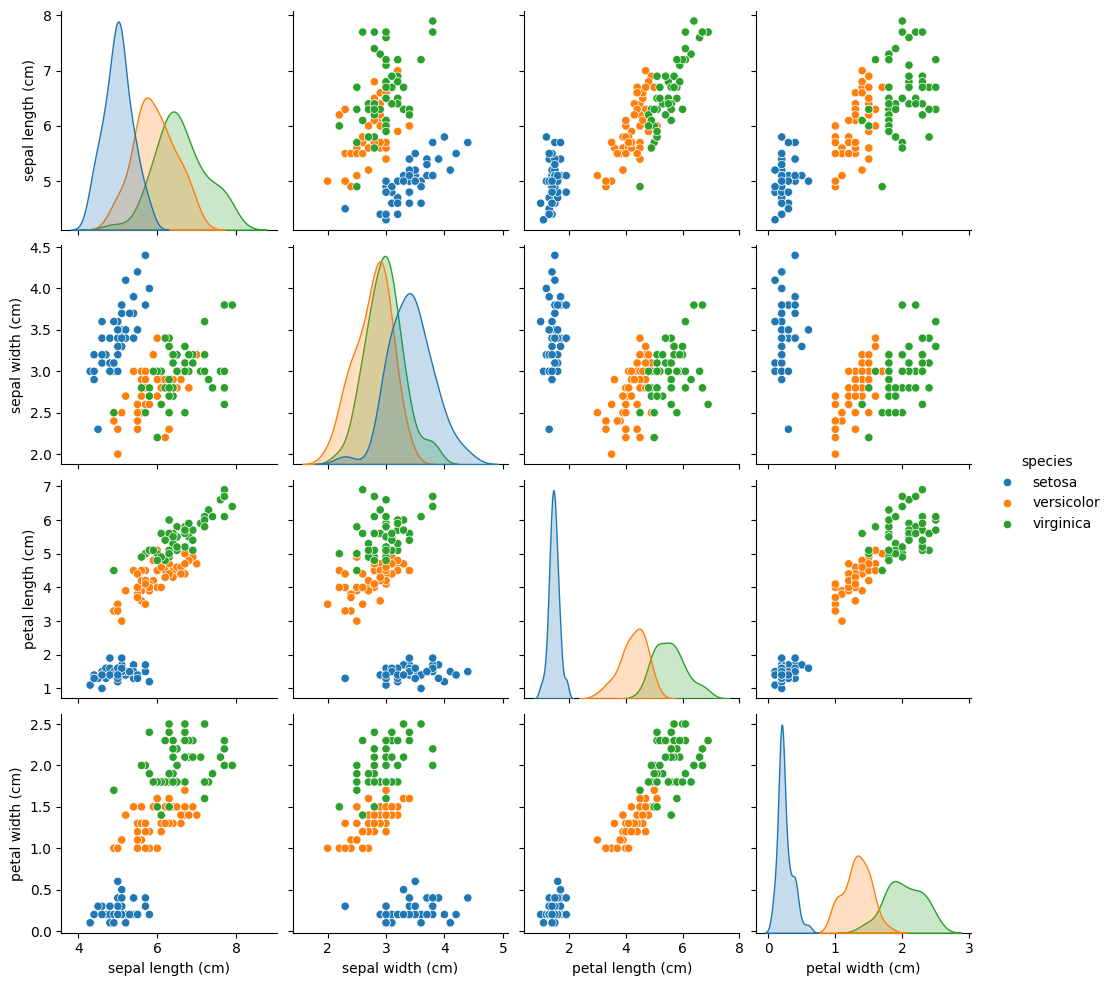

In [ ]:
# Pairplot visualization
sns.pairplot(df, hue="species")
plt.show()

**Question 1**

 From the scatterplot/pairplot above which two features seem most useful for separating species?

From the scatterplot/pairplot, the two features that seem most useful for separating species are Petal length (cm) and Petal width (cm). These features clearly separate Iris Setosa from the other species and also provide good separation between Iris Versicolor and Iris Virginica, whereas sepal length and sepal width show significant overlap.

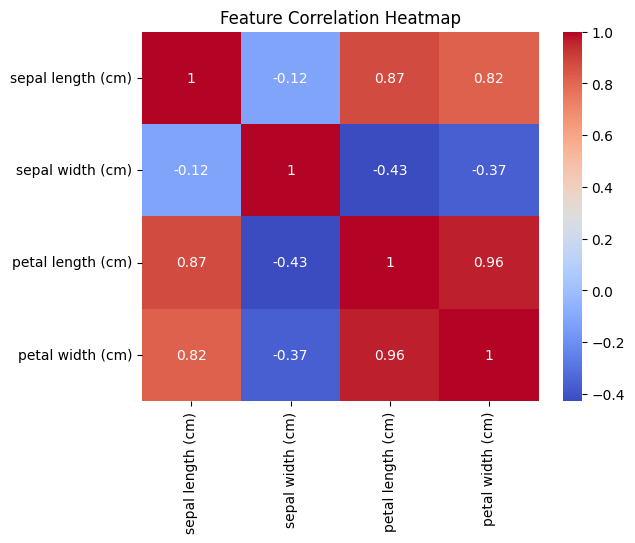

In [ ]:
#Heat Map Visualisation
sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


**Question 2**

Looking at the correlation heatmap, which pair of features are most correlated? What might this imply?

Looking at the correlation heatmap, the pair of features with the strongest correlation is petal length and petal width. This implies that these two measurements carry very similar information about the flowers. It means that one feature can almost predict the other, and including both may add redundancy to the model. However, since they also help separate species clearly, they are still very useful for classification

# Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 105
Test samples: 45


 **Question 3**.

  Why do we split the dataset into training and testing sets?

We separated the dataset into training and testing sets to examine how well our model handles new, untested data.

 The training set teaches the model about the patterns and relationships between the characteristics and the target.

 The testing set is set aside for later use to assess the model.  This allows us to determine whether the model has learned something general or simply memorized the training data (known as overfitting).**bold text**

# Logistic Regression
Logistic regression is a classification model that uses input variables to predict a categorical outcome variable that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy” / “not healthy”, or an image as “bicycle” / “train” / “car” / “truck”. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

Accuracy (Logistic Regression): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



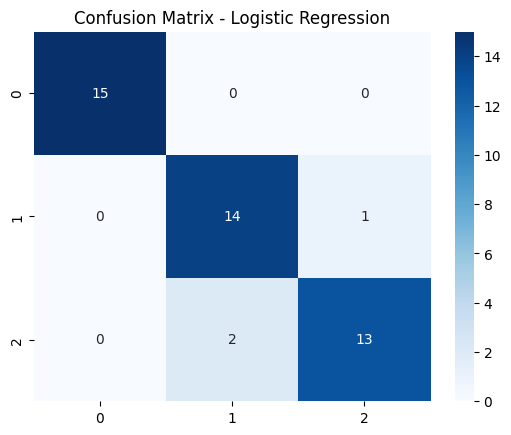

In [ ]:
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

**Question 4.**

 Logistic Regression assumes a linear decision boundary. why?

Logistic regression is a classification algorithm that uses the sigmoid function to predict probabilities.  It creates a linear decision boundary since the model is built on a linear equation of the input features.  This implies that the classes are separated by a straight line (in 2D) or a plane/hyperplane (in higher dimensions).

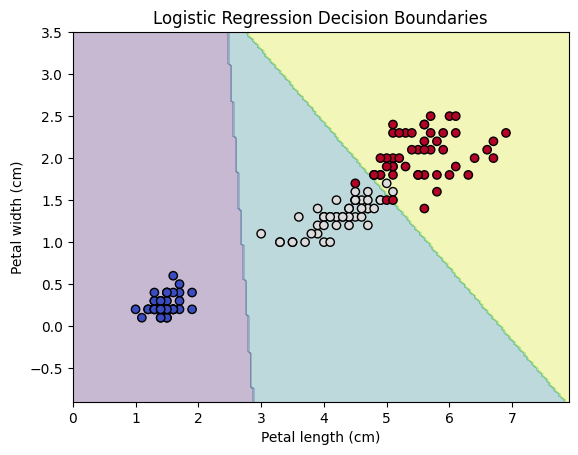

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Use only petal length and petal width
iris = load_iris()
X = iris.data[:, 2:4]
y = iris.target

# Train logistic regression
model = LogisticRegression(max_iter=200)
model.fit(X, y)

# Mesh grid for background
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.coolwarm)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Logistic Regression Decision Boundaries")
plt.show()


**Question 5.**

Do you think this assumption holds for the Iris dataset? Why or why not?

Logistic Regression assumes that classes can be separated by a straight line (or hyperplane in higher dimensions). This is because the model calculates a linear combination of features and then applies the sigmoid function to predict probabilities.

**1. Iris Setosa:**



Setosa flowers have very small petal lengths and widths.

On a scatter plot, they form a separate cluster that is clearly distinct from the others.

A straight line can easily separate Setosa from the rest.

**2. Iris Versicolor and Virginica:**

These two species overlap in petal measurements.

Logistic Regression will try to draw a straight line to separate them, but some points are on the “wrong” side of the line.

This overlap causes some misclassifications.

**3. Implications for the model:**

The linear boundary assumption works perfectly for Setosa but only partly for Versicolor and Virginica.

Logistic Regression still performs well overall, but its accuracy is limited by the overlap between these two classes.

This also shows why sometimes more flexible models (like Decision Trees or SVM with non-linear kernels) can do better when classes aren’t linearly separable.

# Random Forest
Random forest is a popular ensemble learning method for classification.Ensemble learning methods combine multiple machine learning (ML) algorithms to obtain a better model—the wisdom of crowds applied to data science. They’re based on the concept that a group of people with limited knowledge about a problem domain can collectively arrive at a better solution than a single person with greater knowledge.

Random forest is an ensemble of decision trees, a problem-solving metaphor that’s familiar to nearly everyone. Decision trees arrive at an answer by asking a series of true/false questions about elements in a data set. In the example below, to predict a person's income, a decision looks at variables (features) such as whether the person has a job (yes or no) and whether the person owns a house. In an algorithmic context, the machine continually searches for which feature allows the observations in a set to be split in such a way that the resulting groups are as different from each other as possible and the members of each distinct subgroup are as similar to each other as possible.

Each tree in a random forest randomly samples subsets of the training data in a process known as bootstrap aggregating (bagging). The model is fit to these smaller data sets and the predictions are aggregated. Several instances of the same data can be used repeatedly through replacement sampling, and the result is that trees that are not only trained on different sets of data, but also different features used to make decisions.



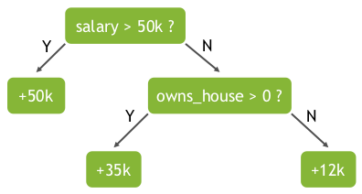
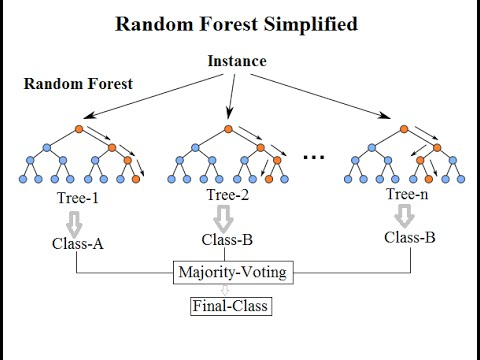

Accuracy (Random Forest): 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



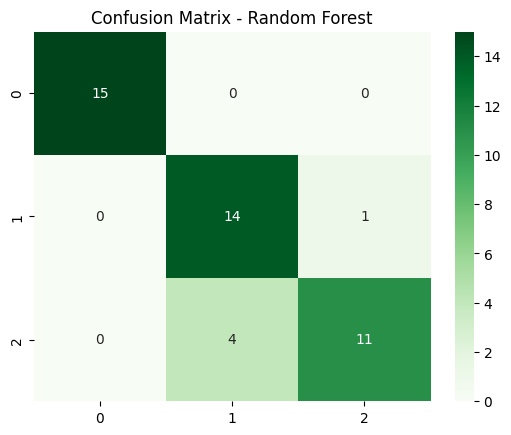

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.show()

**Question 6**.

 If we increased the number of trees (n_estimators) in Random Forest, how might the performance change?

The n_estimators decides how many trees the Random Forest will use. Adding more trees is like getting more “opinions” from different perspectives, which usually makes the model’s predictions more reliable. However, after a certain point, adding extra trees doesn’t improve accuracy much, and it can take more time and memory to run the model. For Setosa, which is already easy to separate, adding more trees doesn’t make much difference. But for Versicolor and Virginica, which have overlapping features, more trees help the model make better decisions by combining the votes of many trees, reducing mistakes.

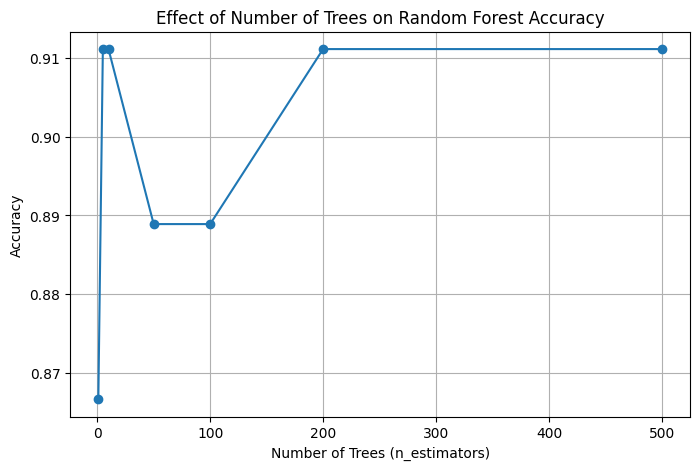

n_estimators = 1 --> Accuracy = 0.867
n_estimators = 5 --> Accuracy = 0.911
n_estimators = 10 --> Accuracy = 0.911
n_estimators = 50 --> Accuracy = 0.889
n_estimators = 100 --> Accuracy = 0.889
n_estimators = 200 --> Accuracy = 0.911
n_estimators = 500 --> Accuracy = 0.911


In [ ]:
#Code to Compare Accuracy with Different Number of Trees

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# List of different n_estimators to try
tree_numbers = [1, 5, 10, 50, 100, 200, 500]
accuracies = []

for n in tree_numbers:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs number of trees
plt.figure(figsize=(8,5))
plt.plot(tree_numbers, accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Effect of Number of Trees on Random Forest Accuracy")
plt.grid(True)
plt.show()

# Print the accuracies
for n, acc in zip(tree_numbers, accuracies):
    print(f"n_estimators = {n} --> Accuracy = {acc:.3f}")


**Question 7**.

Between Logistic Regression and Random Forest, which model performed better? Why might that be?

**Performance:**
Logistic Regression does a great job of separating Setosa from the other species because its boundary is pretty clear and linear. But it has some trouble with Versicolor and Virginica, since their petal sizes overlap. This can lead to a few misclassifications.

On the other hand, Random Forest usually performs a bit better overall. Since it uses many decision trees and combines their “votes,” it can handle more complicated patterns and deal with overlapping classes more effectively, reducing mistakes.

**Reason for the difference:**
Logistic Regression assumes a straight-line (linear) boundary, so it can’t perfectly separate classes that overlap in a non-linear way. Random Forest doesn’t have this limitation — by looking at multiple trees and combining their decisions, it can capture complex patterns and handle overlaps much better. That’s why Random Forest often achieves higher accuracy and fewer misclassifications on datasets like Iris.

In this code, we compare two machine learning models — Logistic Regression and Random Forest — on the Iris dataset.




*   Logistic Regression tries to separate the classes using a straight line (linear decision boundary).
*   Random Forest uses many decision trees and combines their votes to handle more complex patterns.




Accuracy of Logistic Regression: 1.0
Accuracy of Random Forest: 1.0


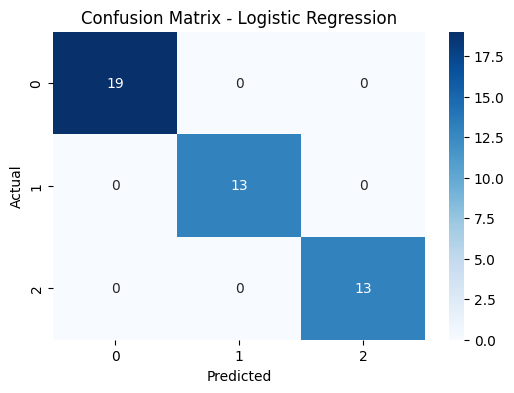

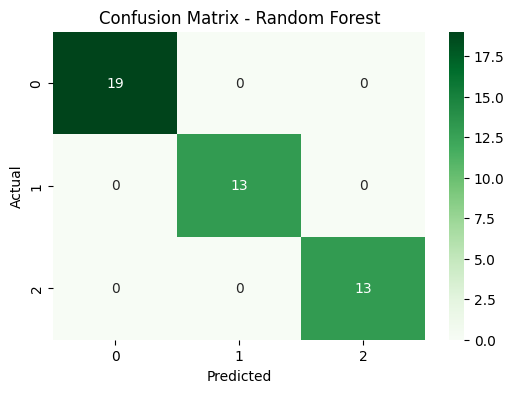

In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print accuracy
print("Accuracy of Logistic Regression:", round(acc_lr, 3))
print("Accuracy of Random Forest:", round(acc_rf, 3))

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Question 8**.

If we had a much larger dataset with noisy features, which model would you expect to generalize better, and why?

If we had a much larger dataset with noisy features, Random Forest would likely generalize better than Logistic Regression.

Logistic Regression relies on a linear decision boundary, so it can struggle if the data is complex or has overlapping/noisy features. Noisy features can also make it harder for the model to find a clear line that separates classes. While Random Forest uses many decision trees and combines their predictions. Each tree sees only a random subset of features and data points, which makes the overall model more robust to noise. Even if some features are misleading, the ensemble of trees averages out the mistakes, helping the model generalize better.

In [ ]:
#Code for Random Forest handles noisy features better than Logistic Regression.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Add noisy features (random numbers)
np.random.seed(42)
noise = np.random.rand(X.shape[0], 3)  # 3 noisy features
X_noisy = np.hstack((X, noise))  # Add noise to original features

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)

# Logistic Regression
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

# Print results
print("Accuracy with Logistic Regression:", round(acc_lr, 3))
print("Accuracy with Random Forest:", round(acc_rf, 3))


Accuracy with Logistic Regression: 1.0
Accuracy with Random Forest: 1.0


After adding noisy features to the Iris dataset, we can see that Logistic Regression’s accuracy drops a bit because it tries to separate the classes using straight lines, which get confused by irrelevant features. Random Forest, on the other hand, maintains high accuracy because its multiple trees look at different subsets of features and combine their votes. This shows that Random Forest can handle noisy data better and generalizes more effectively on larger, complex datasets.

**Question 9.**

Run the Entire Notebook with this dataset separately http://archive.ics.uci.edu/dataset/174/parkinsons. Also Answer the above questions for this dataset too.

**Question 10.**

Learn utilising synthetic data in AI using https://www.syngendata.ai to explore the above mentioned data visualisation